## Программы-генераторы случайных чисел.


In [1]:
import ROOT
from ROOT import gRandom, TCanvas, TF1, TH1F
import math
from math import cos

a = -1
b = 1
norm = 1

L = 10000


g = ROOT.gRandom;


def f(x,p): return ((x[0]**4)+1.+(cos(x[0]))**2)*p[0]

Welcome to JupyROOT 6.18/04


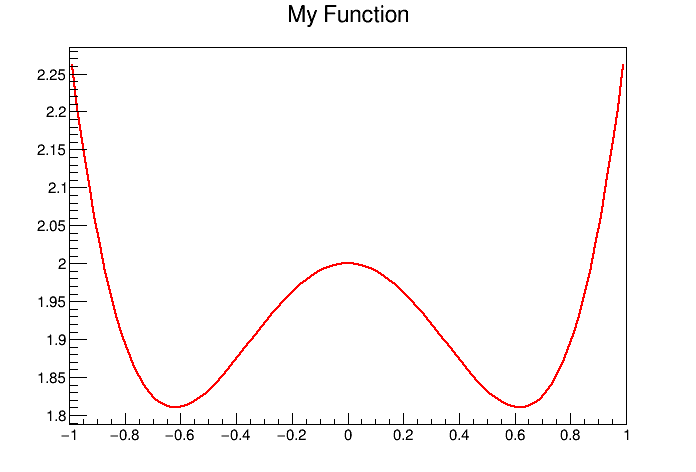

In [2]:
c = ROOT.TCanvas()
ff = ROOT.TF1("My Function", f, a, b, norm)
ff.SetParameter(0, norm)
ff.Draw()
c.Draw()

## Метод Неймана

In [3]:
fmax = f([0], [norm])
def FNeuman(norm, a, b):
    if b <= a or norm <= 0:
        raise 'WRONG ARGUMENTS'
    

    while True:
        mu = g.Uniform(0, fmax)
        r = g.Uniform(a, b)
        if mu <= f([ r ], [norm]): return r

In [4]:
H1 = ROOT.TH1F('H1', 'Neuman method', 100, a, b)

In [5]:
sw = ROOT.TStopwatch()
sw.Start()
for i in range (0, L):
    H1.Fill(FNeuman(norm, a, b))
sw.Stop()
sw.Print()

Real time 0:00:00, CP time 0.220


 FCN=77.3906 FROM MIGRAD    STATUS=CONVERGED      12 CALLS          13 TOTAL
                     EDM=2.32315e-13    STRATEGY= 1      ERROR MATRIX ACCURATE 
  EXT PARAMETER                                   STEP         FIRST   
  NO.   NAME      VALUE            ERROR          SIZE      DERIVATIVE 
   1  p0           5.14852e+01   5.16856e-01   2.47521e-03   1.31882e-06


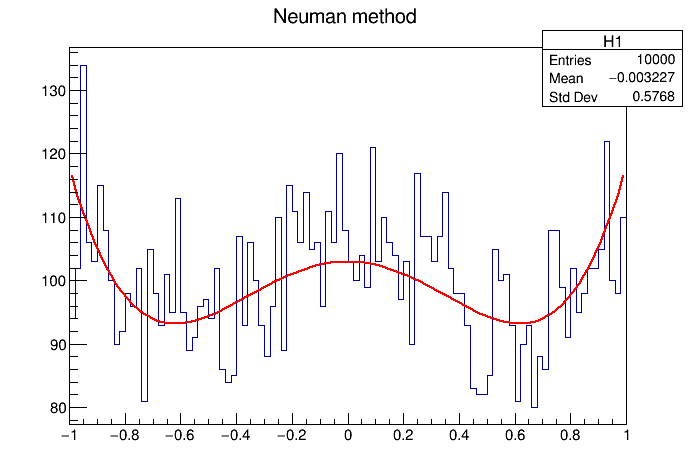

In [6]:
H1.Draw()
c.Draw()
fit1 = H1.Fit(ff)

In [7]:
print('First moment = ', H1.GetMean())
print('Standard deviation = ', H1.GetStdDev())

First moment =  -0.0032266025430057197
Standard deviation =  0.5768461766095173


## Метод композиций и реджекций

Исходную функцию разобьем на две: f1=1+(cos(x))^2 и f2=x^4. f1-считаем Нейманом, f2-прямой выборкой 

In [8]:
def f1(x): return (1.+(cos(x))**2)
def f2(x): return x**4

def abs_and_pow(x,n):
    if x>=0: return pow(x,n)
    else: return -pow(-x,n)

In [9]:
с0 = a**5
с1 = b**5-a**5

In [10]:
def F2(x): return (x**5 - с0)/5          
def F2rev(x): return (abs_and_pow(с1*x + с0, 0.2))

In [11]:
def SecondMethod(a,b):
    M = f1(b) + f2(b)
    alf = F2(b)
    beta = M*(b-a)/(M*(b-a)+alf)
    while True:
        v = g.Uniform(0,1)
        if v > beta:
            k = g.Uniform(0,1)
            return F2rev(k)
        else:
            mu = g.Uniform(0, M)
            r1 = g.Uniform(a, b)
            if mu < f1(r1): return r1

In [12]:
H2 = ROOT.TH1F('H2', 'Second method', 100, a, b)

In [13]:
sw.Start()
for i in range (0, L):
    H2.Fill(SecondMethod(a,b))
sw.Stop()
sw.Print()

Real time 0:00:00, CP time 0.280


 FCN=99.4631 FROM MIGRAD    STATUS=CONVERGED      12 CALLS          13 TOTAL
                     EDM=5.33542e-20    STRATEGY= 1      ERROR MATRIX ACCURATE 
  EXT PARAMETER                                   STEP         FIRST   
  NO.   NAME      VALUE            ERROR          SIZE      DERIVATIVE 
   1  p0           5.13707e+01   5.16281e-01   2.52673e-03  -6.32723e-10


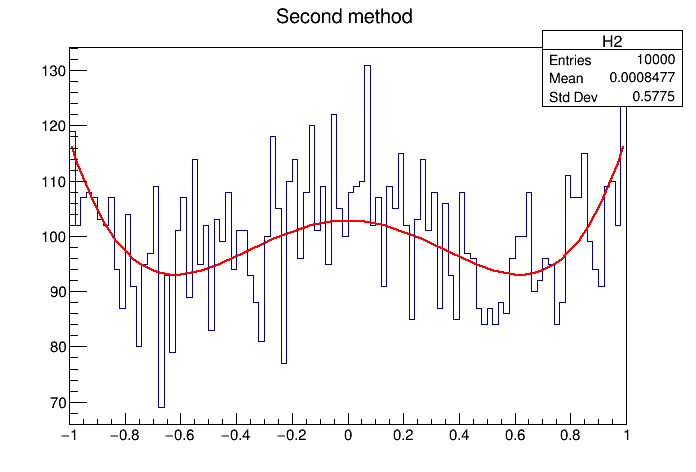

In [14]:
H2.Draw()
c.Draw()
fit2 = H2.Fit(ff)

In [15]:
print('First moment = ', H2.GetMean())
print('Standard deviation = ', H2.GetStdDev())

First moment =  0.0008477299410817583
Standard deviation =  0.5774560721534333


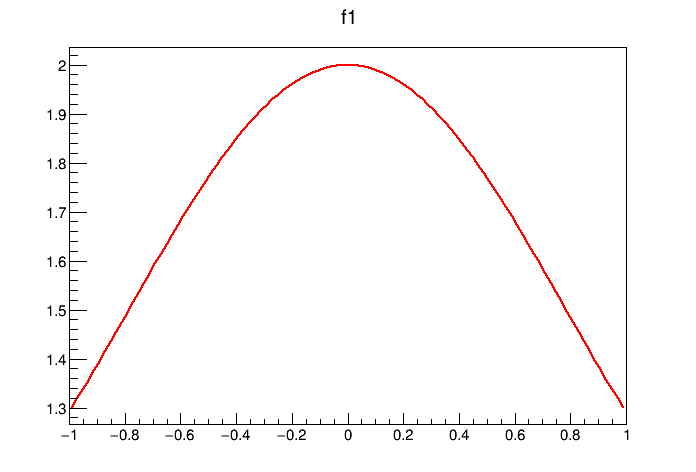

In [27]:
def g1(x,p): return (1.+(cos(x[0]))**2)*p[0]

ff1 = ROOT.TF1("f1", g1, a, b, norm)
ff1.SetParameter(0, norm)
ff1.Draw()
c.Draw()

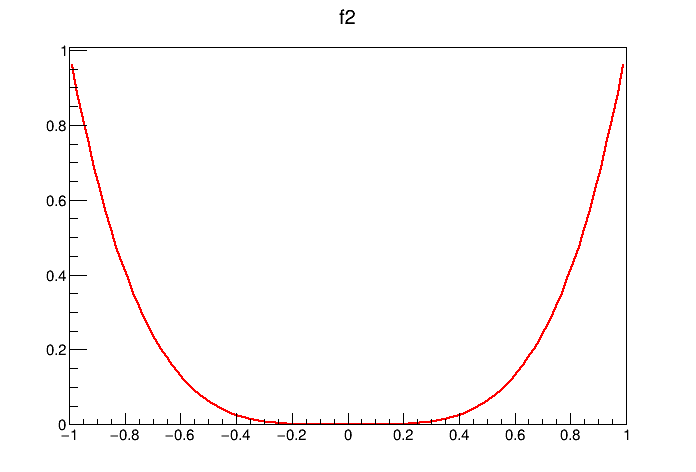

In [28]:
def g2(x,p): return (x[0]**4)*p[0]

ff2 = ROOT.TF1("f2", g2, a, b, norm)
ff2.SetParameter(0, norm)
ff2.Draw()
c.Draw()

In [32]:
print(abs_and_pow(с1*0 + с0, 0.2))    
print(abs_and_pow(с1*1 + с0, 0.2)) 

-1.0
1.0
